# Incremental Search (Chapra Pg. 123)

$$
    f(x_{l})f(x_{u})<0
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def incsearch(func, xmin, xmax, ns = 50):
    """
   incsearch: incremental search locator
      incsearch(func,xmin,xmax,ns)
      ﬁnds brackets of x that contain sign changes in
      a function of x on an interval
   input:
      func = name of the function
      xmin, xmax = endpoints of the interval
      ns = number of subintervals, default value = 50
   output: a tuple containing
      nb = number of bracket pairs found
      xb = list of bracket pair values
      or returns "no brackets found"
   """

    x= np.linspace(xmin, xmax, ns) # create array of x values
    f = [] # build array of corresponding x values
    for k in range(ns-1):
        f.append(func(x[k])) 
    nb = 0

    xb = []
    for k in range(ns-2):
        if func(x[k])*func(x[k+1]) < 0 :
            nb = nb+1
            xb.append((x[k], x[k+1]))

        

    if nb == 0:
        return 'no brackets found'
    else:
        return nb, xb

## Example

$$f(x) = \sin(10x) + cos (3x) $$

In [3]:
def func(x):
    return np.sin(10*x) + np.cos(3*x)

num = np.linspace(-3,6,100)

nb, xb = incsearch(func,3,6)
xb

[(3.2448979591836733, 3.306122448979592),
 (3.306122448979592, 3.36734693877551),
 (3.7346938775510203, 3.795918367346939),
 (4.653061224489796, 4.714285714285714),
 (5.63265306122449, 5.6938775510204085)]

(3.0, 6.0)

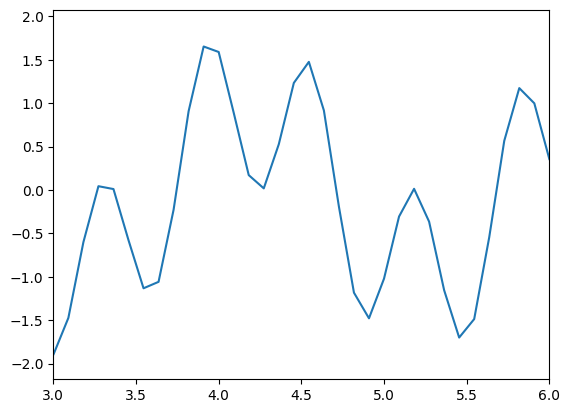

In [4]:
plt.plot(num, func(num))
plt.xlim(3,6)

# Bisection Method (Chapra Pg. 129)

Estimate the root 
$$
    xr = \frac{x_{l}+x_{u}}{2}
$$

Estimate the absolute error to break the loop

$$
    \varepsilon_{a} = \left|\frac{x_{r}^{new} - x_{r}^{old}}{x_{r}^{new}} \right| 100\%
$$

Bisection method for a fixed number of 20 iterations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Bisectl(func, xl, xu, maxit = 20):
    """
    Uses the bisection method to estimate a root of func(x).
    The method is iterated maxit (default = 20) times.
    Input:
      func = name of the function
      xl = lower guess
      xu = upper guess
    Output:
      xm = root estimate
      or
      error message if initial guesses do not bracket solution
    """
    
    if func(xl)*func(xu) > 0:
        return 'Initial estimates do not bracket the solution'
    
    for i in range(maxit):
        xm = (xl+xu)/2
        if func(xm)*func(xl) > 0:
            xl = xm
        else:
            xu = xm
   
    return xm

## Implementation

Implementing this function on equation for Bungee Jumping:
$$
    f(m) = \sqrt{\frac{mg}{c_{d}} }\tanh{\left( \sqrt{\frac{gc_{d}}{m}}t \right)} - v
$$

In [6]:
def Func(m):
    g = 9.81
    cd = 0.25
    t = 4
    v = 36
    
    return np.sqrt(m*g/cd)*np.tanh(np.sqrt(g*cd/m)*t) - v

m = Bisectl(Func, 50, 200)
print('mass = {0:7.3f} kg'.format(m))

mass = 142.738 kg


Bisection method including relatice error and iteration termination criteria


In [15]:
def Bisect(func, xl, xu, es = 1e-7, maxit =30):
    """
    Uses the bisection method to estimate a root of func(x).
    The method is iterated until the relative error from
    one iteration to the next falls below the speciﬁed
    value or until the maximum number of iterations is
    reached ﬁrst.
    Input:
      func = name of the function
      xl = lower guess
      xu = upper guess
      es = relative error speciﬁcation (default 1.e−7)
      maxit = maximum number of iterations allowed (default 30)
    Output:
      xm = root estimate
      fm = function value at the root estimate
      ea = actual relative error achieved
      i+1 = number of iterations required
      or
      error message if initial guesses do not bracket solution
    """
    if func(xl)*func(xu) > 0:
        return 'Initial estimates do not bracket solution'
    
    xmold = xl
    for i in range(maxit):
        xm = (xl+xu)/2
        ea = abs((xm - xmold)/xm)
        if ea < es: break
        if func(xm)*func(xl) > 0:
            xl = xm
        else:
            xu = xm
        xmold = xm
    
    return xm, func(xm), ea, i+1

Implementation

In [16]:
m, fm, ea, iter = Bisect(Func, 50, 200)
print('mass = {0:10.6g} kg'.format(m))
print('function value = {0:7.3g}'.format(fm))
print('relative error = {0:7.3g}'.format(ea))
print('iterations = {0:5d}'.format(iter))

mass =    142.738 kg
function value = 5.85e-08
relative error = 6.26e-08
iterations =    24
